<a href="https://colab.research.google.com/github/humerasharief/Query_intent_detector/blob/main/IMP_BERT_working_file_01_Dec_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [2]:
from google.colab import files
uploaded = files.upload()

Saving consumer_cleaned.csv to consumer_cleaned.csv


In [3]:
# Required to preprocess text for BERT inputs
!pip install -q tensorflow-text==2.6.0

     |████████████████████████████████| 4.4 MB 7.4 MB/s 
     |████████████████████████████████| 464.3 MB 34 kB/s 
     |████████████████████████████████| 1.3 MB 55.7 MB/s 
     |████████████████████████████████| 462 kB 78.1 MB/s 
     |████████████████████████████████| 132 kB 76.2 MB/s 
     |████████████████████████████████| 14.9 MB 45.1 MB/s 
     |████████████████████████████████| 5.6 MB 48.3 MB/s 
     |████████████████████████████████| 152 kB 87.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
pydantic 1.10.2 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.2 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1

In [5]:
import os
#import shutil
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sns
from pylab import rcParams

import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
import warnings
warnings.filterwarnings("ignore")

In [27]:
bert_df = pd.read_csv('consumer_cleaned.csv', encoding='latin-1')

In [28]:
X = bert_df['Consumer_complaint_narrative']
y = bert_df['category_id']

In [29]:
bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' 
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/2',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2


In [10]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [30]:
bert_preprocess_model

In [12]:
bert_df

,Unnamed: 0,product,Consumer_complaint_narrative,category_id
0,190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
1,190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
2,190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
3,190207,Mortgage,I have an open and current mortgage with Chase...,2
4,190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2
...,...,...,...,...
66801,553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h...",4
66802,553085,Credit reporting,Reflecting incorrect payment status. Have been...,4
66803,553086,Payday loan,I have been paying {$180.00} a month through d...,7
66804,553090,Mortgage,I recently became aware that Amerisave Mortgag...,2


In [13]:
trainfeatures=bert_df.copy()
trainlabels=trainfeatures.pop("category_id")

In [14]:
trainlabels

0        0
1        1
2        2
3        2
4        2
        ..
66801    4
66802    4
66803    7
66804    2
66805    2
Name: category_id, Length: 66806, dtype: int64

In [15]:
trainfeatures

,Unnamed: 0,product,Consumer_complaint_narrative
0,190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
1,190135,Consumer Loan,Due to inconsistencies in the amount owed that...
2,190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
3,190207,Mortgage,I have an open and current mortgage with Chase...
4,190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...,...,...
66801,553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h..."
66802,553085,Credit reporting,Reflecting incorrect payment status. Have been...
66803,553086,Payday loan,I have been paying {$180.00} a month through d...
66804,553090,Mortgage,I recently became aware that Amerisave Mortgag...


In [16]:
trainfeatures.pop('product')

0         Debt collection
1           Consumer Loan
2                Mortgage
3                Mortgage
4                Mortgage
               ...       
66801    Credit reporting
66802    Credit reporting
66803         Payday loan
66804            Mortgage
66805            Mortgage
Name: product, Length: 66806, dtype: object

In [17]:
trainfeatures

,Unnamed: 0,Consumer_complaint_narrative
0,190126,XXXX has claimed I owe them {$27.00} for XXXX ...
1,190135,Due to inconsistencies in the amount owed that...
2,190155,In XX/XX/XXXX my wages that I earned at my job...
3,190207,I have an open and current mortgage with Chase...
4,190208,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...,...
66801,553084,"XXXX XXXX is reporting incorrectly, payments h..."
66802,553085,Reflecting incorrect payment status. Have been...
66803,553086,I have been paying {$180.00} a month through d...
66804,553090,I recently became aware that Amerisave Mortgag...


In [18]:
trainfeatures.pop('Unnamed: 0')

0        190126
1        190135
2        190155
3        190207
4        190208
          ...  
66801    553084
66802    553085
66803    553086
66804    553090
66805    553096
Name: Unnamed: 0, Length: 66806, dtype: int64

In [19]:
trainfeatures

,Consumer_complaint_narrative
0,XXXX has claimed I owe them {$27.00} for XXXX ...
1,Due to inconsistencies in the amount owed that...
2,In XX/XX/XXXX my wages that I earned at my job...
3,I have an open and current mortgage with Chase...
4,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...
66801,"XXXX XXXX is reporting incorrectly, payments h..."
66802,Reflecting incorrect payment status. Have been...
66803,I have been paying {$180.00} a month through d...
66804,I recently became aware that Amerisave Mortgag...


In [20]:
trainfeatures=trainfeatures.values

In [21]:
trainfeatures

array([['XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n'],
       ['Due to inconsistencies in the amount owed that I was told by M & T Bank and the amount that was reported to the credit reporting agencies, I was advised to write a good will letter in order to address the issue and request the negative entry be removed from my credit report all together. I had a vehicle that was stolen and it was declared a total loss by insurance company. The insurance company and the GAP insurancw companypaid the outstanding balance of the loan, but I was told by M & T Bank that there was still a balance due on the loan. In good faith, without having received any proof as to why there was still a balance, I made a partial payment towards the remaini

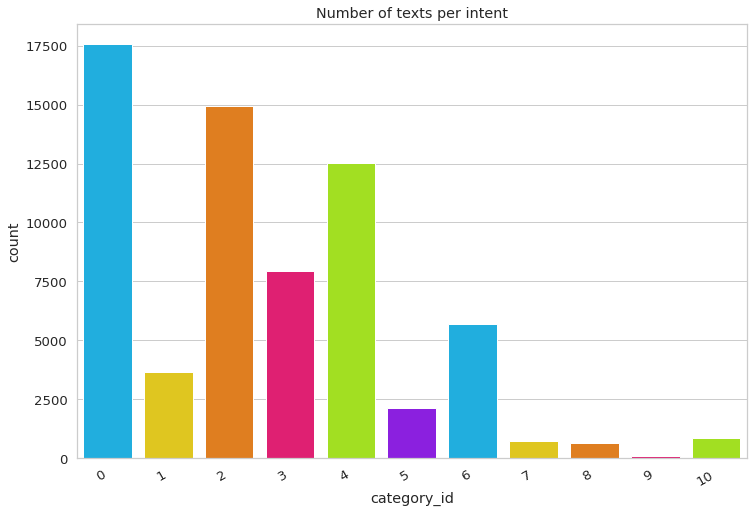

In [22]:
chart = sns.countplot(trainlabels, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [25]:
trainlabels.shape

(66806, 11)

In [26]:
trainlabels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [34]:
X_train

26077    Ensure that closed account # XXXX is reported ...
24929    I received a call on XXXX/XXXX/15 from a Rose ...
39438    I have another complaint that 's related, # XX...
53699    I am behind on my mortgage due to an extended ...
18068    The company has been harassing me with letters...
                               ...                        
37194    I have contacted your company before with a co...
6265     They agreed to allow my son to make his XXXX p...
54886    XXXX has been on my Equifax Report for over 9 ...
860      In the last few years I have received repeated...
15795    I was in school. apparently had no knowledge o...
Name: Consumer_complaint_narrative, Length: 46764, dtype: object

In [35]:
y_train

26077    3
24929    0
39438    4
53699    2
18068    0
        ..
37194    5
6265     1
54886    4
860      0
15795    5
Name: category_id, Length: 46764, dtype: int64

In [36]:
binarizer=LabelBinarizer()
trainlabels=binarizer.fit_transform(y_train.values)

In [37]:
trainlabels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
testlabels=binarizer.fit_transform(y_test.values)

In [39]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [40]:
X_train[0]

'XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n'

In [41]:
X_train=X_train.values

In [44]:
X_test=X_test.values

In [59]:
X_test

array(["I have been battling with portfolio recovery and Foster, Garbus & Garbus for over a year regarding a debt that is not mine. I continue receiving letters from Foster, Garbus XXXX Garbus regarding same debt although I 've submitted documents to Foster, Garbus & Garbus proving that I DO NOT OWE said debt. These guys went as far as having my XXXX XXXX account frozen last year and I thought the issue was resolved once I submitted my documents. \n",
       "In the fall of XXXX I applied for a mortgage modification from XXXX XXXX XXXX. I was laid off XXXX XXXX of that year and decided to just retire. After over a year and a half I finally received the signed documents from XXXX in XXXX of XXXX. It was pure XXXX the entire time working with them. As soon as I received the signed documents XXXX sold my mortgage to GreenTree. GreenTree would not acknowledge that I had a modification and finally in the fall started foreclosure procedures on me. I continued to pay to GreenTree the amount e

In [46]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [47]:
text_test = trainfeatures[0]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101 22038 20348  2038  3555  1045 12533  2068  1063  1002  2676  1012]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [49]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.28588495 -0.39286423 -0.9998232  -0.94041556  0.782238    0.06040548
 -0.9730255   0.40014     0.4460513   0.47686076 -0.89241344 -0.08271404]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.005366    0.983665    0.8469571  ...  0.48957652  0.58745265
   0.0369764 ]
 [ 0.84922034 -0.41929948 -0.06571713 ...  0.17278796  0.01764821
   0.6126734 ]
 [ 0.6017208   0.5713275  -0.5038101  ... -0.00656611 -0.070092
   0.27228135]
 ...
 [-1.562512    0.09342735 -1.0265043  ... -0.3768359   2.3957748
  -0.11117934]
 [ 0.17418869  0.42528078 -0.30458662 ... -0.34066522  1.447731
   1.0538173 ]
 [ 0.3118539   1.511536    0.33534175 ... -0.94769657  0.6288417
   0.33754215]]


In [50]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(11, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [51]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(trainfeatures[0]))
print(tf.keras.activations.softmax(bert_raw_result))

tf.Tensor(
[[0.1273088  0.03658902 0.03346784 0.1179213  0.26687887 0.05486006
  0.1600884  0.07013296 0.02169952 0.09298457 0.01806865]], shape=(1, 11), dtype=float32)


In [52]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
preprocessing (KerasLayer)      {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
BERT_encoder (KerasLayer)       {'default': (None, 5 41373185    preprocessing[0][0]              
                                                                 preprocessing[0][1]              
                                                                 preprocessing[0][2]              
______________________________________________________________________________________________

In [53]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [54]:
epochs=1
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [60]:
testlabels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [61]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=X_train,y=trainlabels,
                               validation_data=(X_test,testlabels),
                               batch_size=32,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
1462/1462 [==============================] - 646s 436ms/step - loss: 0.7414 - categorical_accuracy: 0.7709 - val_loss: 0.5120 - val_categorical_accuracy: 0.8448


In [62]:
loss, accuracy = classifier_model.evaluate(X_test,testlabels)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

627/627 [==============================] - 99s 158ms/step - loss: 0.5120 - categorical_accuracy: 0.8448
Loss: 0.511999249458313
Accuracy: 0.8448258638381958


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


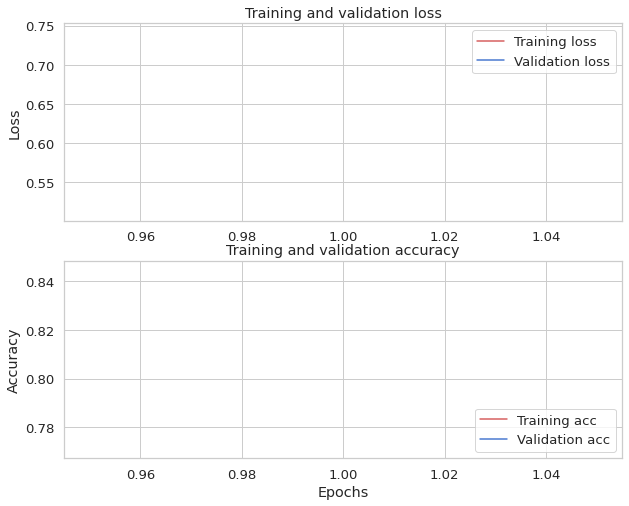

In [63]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(True)
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [65]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : estimated intent: {results[i]}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'play a song from U2',  # this is the same sentence tried earlier
    'Will it rain tomorrow',
    'I like to hear greatist hits from beastie boys',
    'I like to book a table for 3 persons',
    '5 stars for machines like me'
]

results = tf.nn.softmax(classifier_model(tf.constant(examples)))

In [66]:
binarizer.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [67]:
intents=binarizer.inverse_transform(results.numpy())

In [68]:
print_my_examples(examples, intents)

input: play a song from U2            : estimated intent: 0
input: Will it rain tomorrow          : estimated intent: 0
input: I like to hear greatist hits from beastie boys : estimated intent: 3
input: I like to book a table for 3 persons : estimated intent: 4
input: 5 stars for machines like me   : estimated intent: 4



In [69]:
examples = [
    'XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}!',  # this is the same sentence tried earlier
    ]

results = tf.nn.softmax(classifier_model(tf.constant(examples)))

In [70]:
intents=binarizer.inverse_transform(results.numpy())

In [71]:
print_my_examples(examples, intents)

input: XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! : estimated intent: 0



In [72]:
trainlabels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])